In [3]:
import re
s = ''
for i in 'Apalachicola'.lower():
    if i not in 'aeiou':
        s = s + i
print(s)

plchcl


In [4]:
#manipulating text
import re
s = 'this string is pretty long'
p = re.findall('.s', s)
print(p)

['is', ' s', 'is']


In [5]:
import re
#define a string
s1 = 'This is a rather long string'
#replace '.s' with 'WOW'
s2 = re.sub('.s','WOW',s1)
#print old and new string
print(s1,'\n',s2)

This is a rather long string 
 ThWOW WOW a rather longWOWtring


In [13]:
#substituition of strings via matching strings one by one
import re
#a test string
s1 = 'This is a Rather Long String'
pat = '.s'    #a pattern
#find how many instances of the pattern
countmax = len(re.findall(pat,s1))
print(s1)    #print the string
i = 1      #make substituition 1 by 1 
while i < countmax+1:
    #make a change
    s2 = re.sub(pat,'WOW',s1,count=i)
    #print that one change
    print('\t',i,':',s2)
    i += 1   #increment counter

This is a Rather Long String
	 1 : ThWOW is a Rather Long String
	 2 : ThWOW WOW a Rather Long String


In [15]:
import re
#a test string
s1 = 'This is a Rather Long String'
pat = '.s'    #a pattern
#find how many instances of the pattern
countmax = len(re.findall(pat,s1, flags=re.I)) 
#flags= re.Ignoracase
print(s1)    #print the string
i = 1      #make substituition 1 by 1 
while i < countmax+1:
    #make a change
    s2 = re.sub(pat,'WOW',s1,count=i, flags=re.I)
    #print that one change
    print('\t',i,':',s2)
    i += 1   #increment counter

This is a Rather Long String
	 1 : ThWOW is a Rather Long String
	 2 : ThWOW WOW a Rather Long String
	 3 : ThWOW WOW a Rather LongWOWtring


In [18]:
import re
#a test string
s = 'First sentence. Second sentence'
ss1 = s.split('e.') #do a regular split
ss2 = re.split('e.',s) #do re.split
print(s) #print sentence
#print split() results
print('s.split()')
for ss in ss1:
    print('\t"',ss,'"',sep='')
#print re.split() results
print('re.split()')
for ss in ss2:
    print('\t"',ss,'"',sep='')

First sentence. Second sentence
s.split()
	"First sentenc"
	" Second sentence"
re.split()
	"First s"
	"t"
	"c"
	" S"
	"ond s"
	"t"
	"ce"


In [19]:
#concat strings from a list
s = 'This is a sentence.'
wds = s.split()            #split into words
hyphen = '-'               #define hyphen
#join bits with hyphen
hyphenated = hyphen.join(wds)
print(s)
print(hyphenated)

This is a sentence.
This-is-a-sentence.


In [14]:
#load alice in wonderland and separate sentences
#separate using .!?;:
#remove leading and trailing spaces in every sentence
#replace \n and \t with ''
#replace multiple spaces with a single one

import re
alice_file = 'alice.txt'
lines = []
with open(alice_file, 'r') as f:
    for l in f:
        lines.append(l)

    text = '\n'.join(lines[255:])
    text = re.sub('[\n\t]', '', text)
    text = re.sub(' +', ' ', text)
    sentences = re.split('[\.\?!;:]', text)
    sentences = [i.strip() for i in sentences if i.strip()!='']

print(len(sentences))
for i, s in enumerate(sentences[:10]):
    print(f'{i}-{s.strip()}')




2172
0-size
1-to be sure, this generally happens when one eats cake, but Alicehad got so much into the way of expecting nothing but out-of-the-waythings to happen, that it seemed quite dull and stupid for life to goon in the common way
2-So she set to work, and very soon finished off the cake
3-* * * * * * * * * * * * ** * * * * * *CHAPTER II
4-The Pool of Tears“Curiouser and curiouser
5-” cried Alice (she was so much surprised, thatfor the moment she quite forgot how to speak good English)
6-“now I’mopening out like the largest telescope that ever was
7-Good-bye, feet
8-”(for when she looked down at her feet, they seemed to be almost out ofsight, they were getting so far off)
9-“Oh, my poor little feet, Iwonder who will put on your shoes and stockings for you now, dears


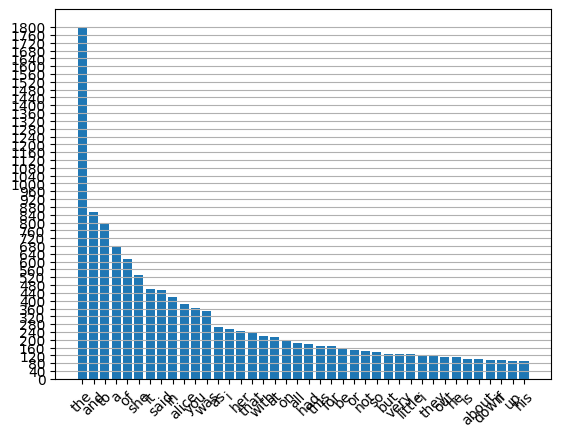

In [18]:
#print the histogram of recurrent words in alice.txt
#from the most frequent to the least and save into a file
#male a barplot using matplotlib

from collections import Counter
import matplotlib.pyplot as plt
# Open the file and read its contents
with open('alice.txt', 'r') as file:
  contents = file.read()
# Split the contents into words
words = contents.lower().split()
# remove all punctuations and special characters
for i in range(len(words)):
  words[i] = words[i].strip('\'`*.,;:?!-()[]{}"')
 
# Count the frequency of each word
word_counts = Counter(words)
# Print the histogram of recurrent words from the most frequent to the least frequent
#and save it into a file and make a barplot using matplotlib
with open('alice_words.txt', 'w') as file:
  for word, count in word_counts.most_common():
    file.write(word + ' ' + str(count) + '\n')
  words = [word for word, count in word_counts.most_common(40)]
  counts = [count for word, count in word_counts.most_common(40)]
  plt.bar(words, counts)
  # activate horizontal grid
  plt.grid(axis='y')
  plt.xticks(rotation=45)
  #ytick every 20 
  plt.yticks(range(0, max(counts), 40))
  plt.savefig('alice_words.png')
  plt.show()



In [7]:
#stemming function for words in -ed
import re
def stem(w):
    #does the word end in ed?
    m = re.search('(^.*)ed$', w)
    if m: 
        return m.group(1) #return the stem (m[0] is the entire word)
    else:
        return w

#get word form command-line
word = input()
root = stem(word)   #stem it
#print word and its stem
print(word,':\t',root,sep='')

ciaoed:	ciao


In [12]:
#the measure of a stem is defined in terms of consonants and vowels
#specifically a consonant is defined as a letter other than a,e,i,o,u or y
#in the case of y, it is a consonant if it is not preceded by a consonant
#we therefore start with a function to determine wheter some specific letter
#in a string is a consonant and print the sequence of C and V accordingly
#example: departed -> CVCVCCVC python -> CVCCVC

import re

#test if letter is consonant 
#with respect to word
def consonant(s, i):
    letter = s[i] #get relavant letter
    #it's not a consonant if it's aeiou
    if letter in 'aeiou':
        return False
    #word-initial y is a consonant
    elif letter == 'y' and i == 0:
        return True
    elif letter == 'y' and consonant(s,i-1):
        return False
    else: 
        return True
    
word = input().lower()
print(word)

for i in range(len(word)):
    if consonant(word, i):
        print('C',end='')
    else:
        print('V',end='')
print()

ohyesyesbroyes
VCVVCVVCCCVCVC


In [1]:
#find all CV combination in a word
#if we take C to be a consonant and V to be a vowel
#porter treats all stems as matching this regular expression
#C*(V+C+)*V* the measure of a stem is defined as the number of times
#the (V+C+)* part matches (remember + indicates one or more occurences
#of the preceding element). Another, simpler way to look at this is that the 
#measure of a string is the number of times the sequence VC occurs.
#Porter gives these examples:
#m = 0 tr, ee, tree, y, by
#m = 1 trouble, oats, trees, ivy
#m = 2 troubles, private, oaten, orrery
#implement the measure function that converts a stem to Cs
#and Vs and the returns the number of times the sequence VC occurs

import re
#checks if some element in a string is a consonant
def consonant(s, i):
    letter = s[i]
    if letter in 'aeiou':
        return False
    elif letter == 'y' and i == 0:
        return True
    elif letter == 'y' and consonant(s,i-1):
        return False
    else:
        return True

#converts string to Cs and Vs
def cv(w):
    res = ''
    for i in range(len(w)):
        if consonant(w, i):
            res += 'C'
        else:
            res += 'V'
    return res
    
#return the measure of a string
def measure(w):
    cvword = cv(w)
    vcs = re.findall('VC', cvword)
    return len(vcs)

     
word = input().lower()
print(word)
print(cv(word))
print(measure(word))

vaiolo
CVVVCV
1


In [5]:
import sys
def rule(c,e,r,w):
    m = re.search('^(.*)'+e+'$',w)
    if m:
        s = m.group(1)
        if c(s):
            return s+r
    return

def mlcond(x):
    if measure(x) > 0:
        return True
    return False

def edrule(w):
    x = rule(mlcond, 'ed', '', w)
    return x

def stem(w):
    res = edrule(w)
    if res:
        return res
    return w

word = input()
print(word)
print(stem(word))

vaioloed
vaiolo
